In [1]:
!pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"
import covsirphy as cs
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

DEPRECATION: Loading egg at /Users/eugene/anaconda3/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Cloning https://github.com/lisphilar/covid19-sir.git to /private/var/folders/sl/jd76tdwn0m13_3g8mc18gf8r0000gn/T/pip-install-tvubbvni/covsirphy_9d2bb4380c144e46bf5863a910c1afaf
  Running command git clone --filter=blob:none --quiet https://github.com/lisphilar/covid19-sir.git /private/var/folders/sl/jd76tdwn0m13_3g8mc18gf8r0000gn/T/pip-install-tvubbvni/covsirphy_9d2bb4380c144e46bf5863a910c1afaf
  Resolved https://github.com/lisphilar/covid19-sir.git to commit 3ddf7f60a1bd54e6be16953d8ee5c0f35f375c08
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
country = "Spain"
scenario = cs.ODEScenario.auto_build(geo=country, model=cs.SIRFModel)

2023-12-12 at 22:51:44 | INFO | 
<SIR-F Model: parameter estimation>
2023-12-12 at 22:51:44 | INFO | Running optimization with 8 CPUs...


  0%|          | 0/62 [00:00<?, ?it/s]

2023-12-12 at 22:52:58 | INFO | Completed optimization. Total: 1 min 13 sec



In [3]:
scenario.summary()

Start        End    Rt     theta     kappa       rho  \
Scenario Phase                                                             
Baseline 0th   2020-02-15 2020-03-25  9.16   0.12556  0.002253  0.144951   
         1st   2020-03-26 2020-04-01  2.16  0.021472  0.004101   0.04595   
         2nd   2020-04-02 2020-04-08  1.36  0.000576  0.003292  0.026882   
         3rd   2020-04-09 2020-04-17  1.13  0.015581   0.00194   0.01773   
         4th   2020-04-18 2020-04-30  0.93  0.024334  0.001193  0.011653   
...                   ...        ...   ...       ...       ...       ...   
         57th  2022-08-11 2022-09-15  0.67   0.03969  0.000492  0.009818   
         58th  2022-09-16 2022-10-30  1.44   0.00117  0.000303  0.084431   
         59th  2022-10-31 2022-12-20  0.27  0.168766  0.000237  0.000093   
         60th  2022-12-21 2023-02-08  1.22  0.044904  0.000214  0.023174   
         61st  2023-02-09 2023-06-11  0.32  0.266037  0.000284  0.028777   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.011584       0.126             148             2   
         1st    0.016732       0.021              81             7   
         2nd    0.016403       0.001             101            12   
         3rd      0.0135       0.016             172            19   
         4th    0.011081       0.024             280            29   
...                  ...         ...             ...           ...   
         57th    0.01348        0.04             677            34   
         58th   0.058226       0.001            1102             4   
         59th   0.000049       0.169            1406          3570   
         60th    0.01796       0.045            1557            14   
         61st   0.064777       0.266            1174            12   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th               29  SIR-F Model  480  
         1st               20  SIR-F Model  480  
         2nd               20  SIR-F Model  480  
         3rd               25  SIR-F Model  480  
         4th               30  SIR-F Model  480  
...                       ...          ...  ...  
         57th              25  SIR-F Model  480  
         58th               6  SIR-F Model  480  
         59th            6752  SIR-F Model  480  
         60th              19  SIR-F Model  480  
         61st               5  SIR-F Model  480  

[62 rows x 13 columns]

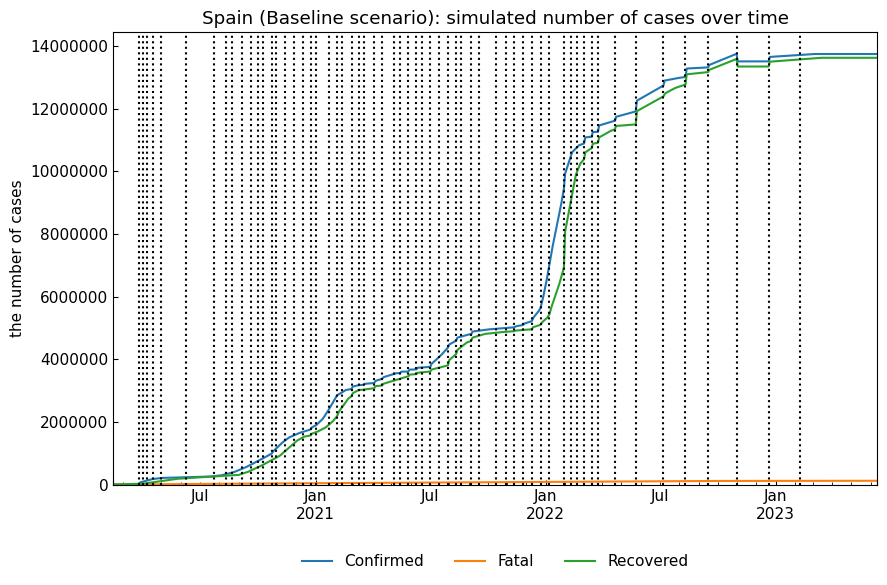

,Confirmed,Fatal,Recovered
Date,,,
2020-02-15,2.0,0.0,2.0
2020-02-16,2.0,0.0,2.0
2020-02-17,2.0,0.0,2.0
2020-02-18,2.0,0.0,2.0
2020-02-19,2.0,0.0,2.0
...,...,...,...
2023-06-07,13747553.0,120678.0,13626875.0
2023-06-08,13747553.0,120678.0,13626875.0
2023-06-09,13747553.0,120678.0,13626875.0


In [4]:
scenario.simulate(name="Baseline")

In [5]:
scenario.track()

,Scenario,Phase,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Date,,,,,,,,,,,,,
2020-02-15,Baseline,0th,9.16,0.12556,0.002253,0.144951,0.011584,0.126,148,2,29,SIR-F Model,480
2020-02-16,Baseline,0th,9.16,0.12556,0.002253,0.144951,0.011584,0.126,148,2,29,SIR-F Model,480
2020-02-17,Baseline,0th,9.16,0.12556,0.002253,0.144951,0.011584,0.126,148,2,29,SIR-F Model,480
2020-02-18,Baseline,0th,9.16,0.12556,0.002253,0.144951,0.011584,0.126,148,2,29,SIR-F Model,480
2020-02-19,Baseline,0th,9.16,0.12556,0.002253,0.144951,0.011584,0.126,148,2,29,SIR-F Model,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07,Baseline,61st,0.32,0.266037,0.000284,0.028777,0.064777,0.266,1174,12,5,SIR-F Model,480
2023-06-08,Baseline,61st,0.32,0.266037,0.000284,0.028777,0.064777,0.266,1174,12,5,SIR-F Model,480
2023-06-09,Baseline,61st,0.32,0.266037,0.000284,0.028777,0.064777,0.266,1174,12,5,SIR-F Model,480


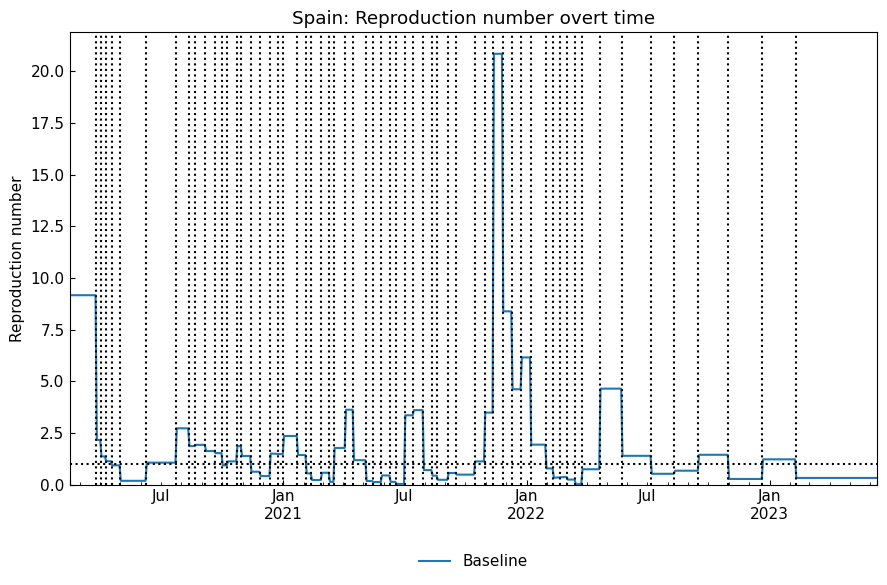

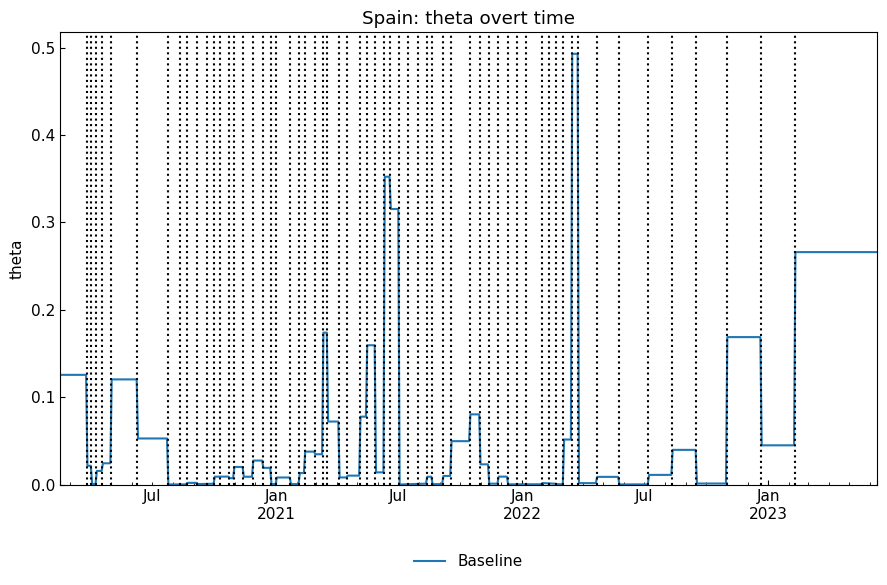

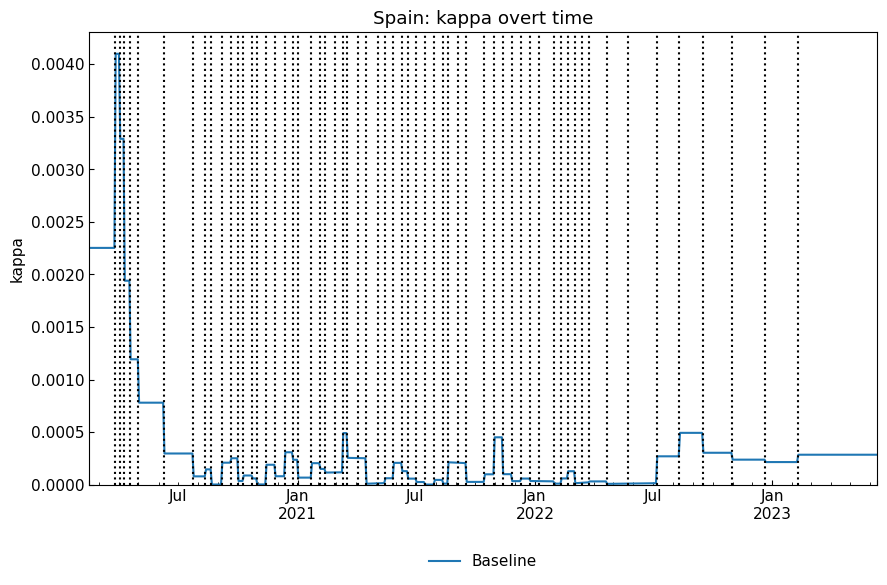

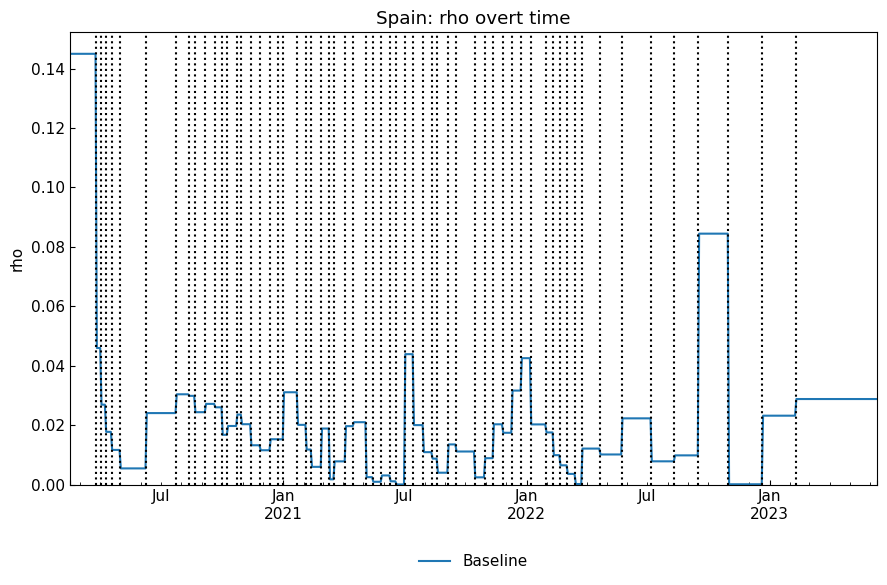

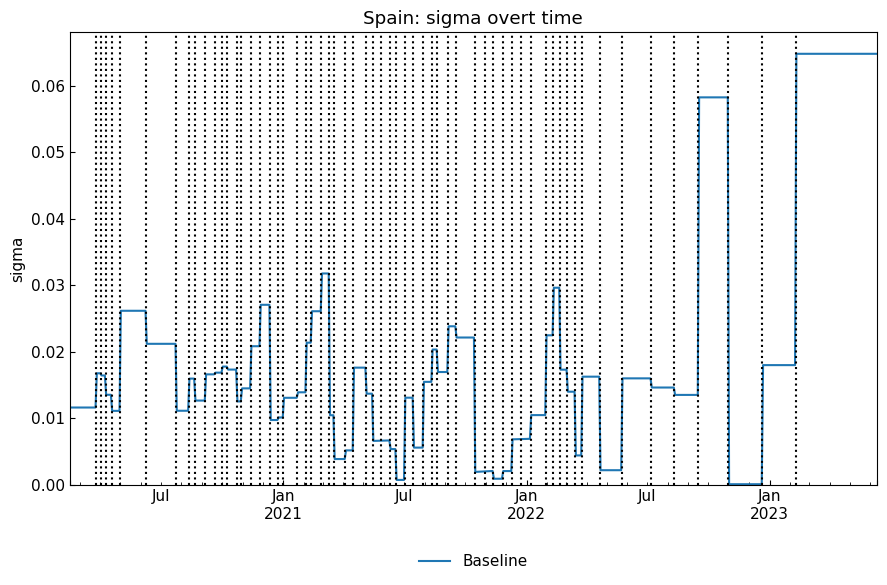

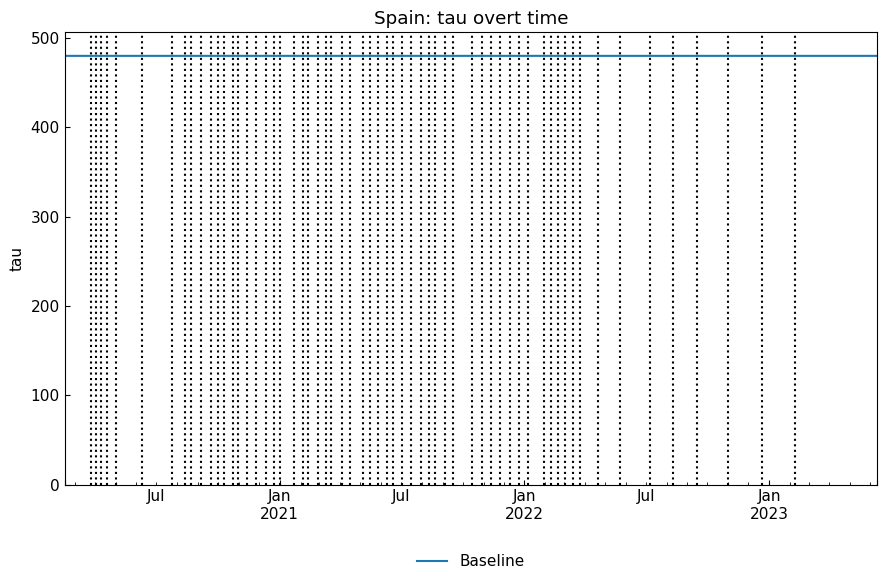

Scenario,Baseline
Date,
2020-02-15,480
2020-02-16,480
2020-02-17,480
2020-02-18,480
2020-02-19,480
...,...
2023-06-07,480
2023-06-08,480
2023-06-09,480


In [6]:
scenario.compare_param("Rt") 
scenario.compare_param("theta") 
scenario.compare_param("kappa")
scenario.compare_param("rho")
scenario.compare_param("sigma")
scenario.compare_param("tau")

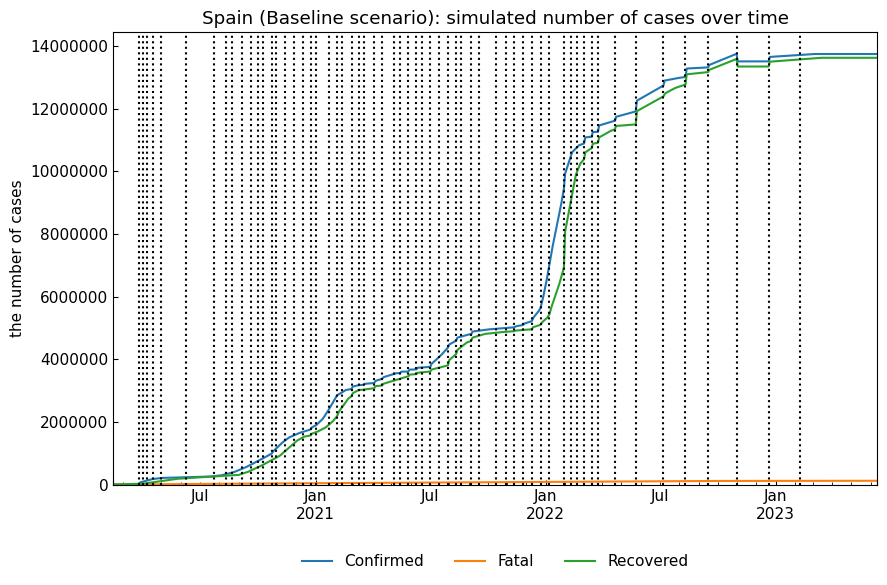

,Confirmed,Fatal,Recovered
Date,,,
2020-02-15,2.0,0.0,2.0
2020-02-16,2.0,0.0,2.0
2020-02-17,2.0,0.0,2.0
2020-02-18,2.0,0.0,2.0
2020-02-19,2.0,0.0,2.0
...,...,...,...
2023-06-07,13747553.0,120678.0,13626875.0
2023-06-08,13747553.0,120678.0,13626875.0
2023-06-09,13747553.0,120678.0,13626875.0


In [7]:
scenario.simulate(name="Baseline")

In [8]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)
future_start_date

Timestamp('2023-06-12 00:00:00')

In [9]:
scenario.build_with_template(name="Predicted", template="Baseline")

scenario.predict(days=7, name="Predicted")

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 13 with model ConstantNaive in generation 0 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "PowerTransformer", "1": "QuantileTransformer", "2": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"lag_1": 7, "method": "LastValue"}}}
Model Number: 14 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round"}, "transformation_params": {"0": {"lag_1": 7, "method": "LastValue"}, "1": {}, "2": {"decimals": 0, "on_transform": false, "on_inverse": true}}}
Model Number: 15 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 364, "lag_2": 30} and transformations {"fillna": "fake_date", "transformations": {"0": "SeasonalDifference", "1": "MaxAbsScaler", "2": "Round

Model Number: 28 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "quadratic", "transformations": {"0": "AnomalyRemoval", "1": "StandardScaler", "2": "CumSumTransformer", "3": "AlignLastValue", "4": "AlignLastValue", "5": "MaxAbsScaler"}, "transformation_params": {"0": {"method": "minmax", "method_params": {"alpha": 0.05}, "fillna": "ffill", "transform_dict": null}, "1": {}, "2": {}, "3": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.7, "first_value_only": true}, "4": {"rows": 4, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "5": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4997, in inverse_transform
    df = self._inverse_one(df, i, trans_method=trans_method, bounds=bounds)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-pa

Model Number: 37 with model SeasonalityMotif in generation 0 of 1 with params {"window": 30, "point_method": "median", "distance_metric": "chebyshev", "k": 10, "datepart_method": "simple", "independent": false} and transformations {"fillna": "rolling_mean", "transformations": {"0": "ClipOutliers", "1": "Detrend"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "Linear", "phi": 1, "window": null, "transform_dict": {"fillna": "rolling_mean_24", "transformations": {"0": "STLFilter", "1": "SeasonalDifference"}, "transformation_params": {"0": {"decomp_type": "seasonal_decompose", "part": "trend"}, "1": {"lag_1": 12, "method": "Mean"}}}}}}
Model Number: 38 with model SeasonalityMotif in generation 0 of 1 with params {"window": 30, "point_method": "median", "distance_metric": "mqae", "k": 10, "datepart_method": "recurring", "independent": true} and transformations {"fillna": "KNNImputer", "transformations": {"0": "AlignLastValue", "1": "P

New Generation: 1 of 1
Model Number: 47 with model SeasonalNaive in generation 1 of 1 with params {"method": "lastvalue", "lag_1": 7, "lag_2": 28} and transformations {"fillna": "zero", "transformations": {"0": "Slice", "1": "Detrend"}, "transformation_params": {"0": {"method": 0.3}, "1": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": null}}}
Model Number: 48 with model AverageValueNaive in generation 1 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "DifferencedTransformer", "1": "PositiveShift", "2": "SeasonalDifference", "3": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {}, "2": {"lag_1": 24, "method": "Median"}, "3": {"method": "minmax", "method_params": {"alpha": 0.05}, "fillna": "ffill", "transform_dict": {"transformations": {"0": "DatepartRegression"}, "transformation_params": {"0": {"datepart_method": "simple_3", "regression_model": {"model": "FastRidge", "model_params": {}}}}}}}}
Mod

Model Number: 62 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "ffill", "transformations": {"0": "StandardScaler", "1": "SeasonalDifference", "2": "RollingMeanTransformer"}, "transformation_params": {"0": {}, "1": {"lag_1": 7, "method": "Mean"}, "2": {"fixed": false, "window": 24}}}
Model Number: 63 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "cubic", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "StandardScaler", "3": "RollingMeanTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": null}, "2": {}, "3": {"fixed": false, "window": 24}}}
Model Number: 64 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "akima", "transformations": {"0": "bkfilter", "1": "SinTrend", "2": "PctChangeTransformer", "3": "bkfilter", "4": "ReplaceC

TotalRuntime missing in 2!
Validation Round: 1
Validation train index is DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-27', '2023-05-28'],
              dtype='datetime64[ns]', name='Date', length=1199, freq=None)
Model Number: 1 of 14 with model ConstantNaive for Validation 1 with params {"constant": 1} and transformations {"fillna": "nearest", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "AlignLastValue"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": 30, "transform_dict": null}, "2": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only

4 - GLS with avg smape 0.93: 
Model Number: 5 of 14 with model LastValueNaive for Validation 2 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "Cointegration"}, "transformation_params": {"0": {"det_order": -1, "k_ar_diff": 0}}}
📈 5 - LastValueNaive with avg smape 0.0: 
Model Number: 6 of 14 with model LastValueNaive for Validation 2 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "PowerTransformer"}, "transformation_params": {"0": {}}}
6 - LastValueNaive with avg smape 0.0: 
Model Number: 7 of 14 with model ConstantNaive for Validation 2 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
7 - ConstantNaive with avg smape 0.0: 
Model Number: 8 of 14 with model AverageValueNaive for Validation 2 with params {"method": "

In [10]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:53:09 | ERROR | validation of end failed
2023-12-12 at 22:53:09 | ERROR | validation of end failed


,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,62nd,2023-06-12,2023-06-18,0.32,0.266037,0.000284,0.028777,0.064777,0.266,1174,12,5,SIR-F Model,480


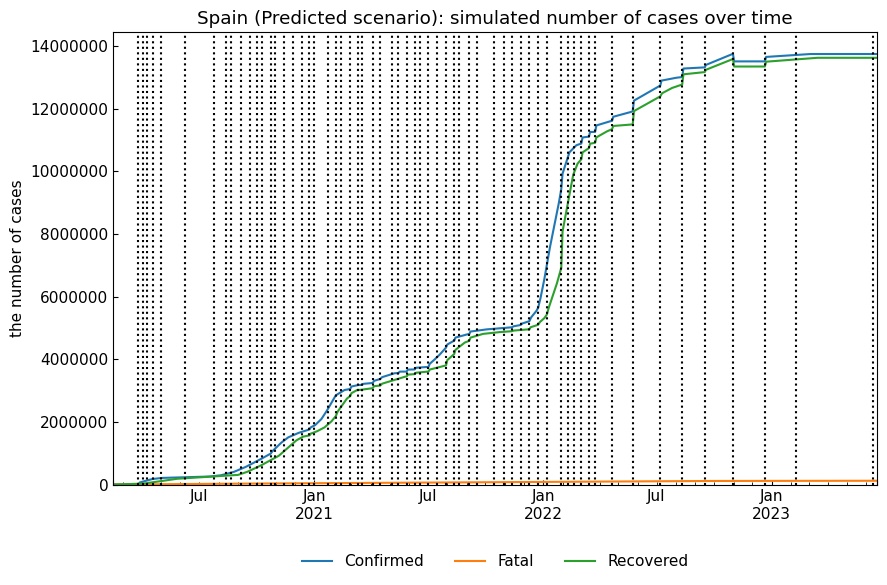

,Confirmed,Fatal,Recovered
Date,,,
2020-02-15,2.0,0.0,2.0
2020-02-16,2.0,0.0,2.0
2020-02-17,2.0,0.0,2.0
2020-02-18,2.0,0.0,2.0
2020-02-19,2.0,0.0,2.0
...,...,...,...
2023-06-14,13747553.0,120678.0,13626875.0
2023-06-15,13747553.0,120678.0,13626875.0
2023-06-16,13747553.0,120678.0,13626875.0


In [11]:
scenario.simulate(name="Predicted")

In [12]:
scenario.build_with_template(name="Predicted", template="Baseline")

scenario.predict(days=30, name="Predicted") 

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 22 with model SeasonalityMotif in generation 0 of 1 with params {"window": 10, "point_method": "median", "distance_metric": "mqae", "k": 15, "datepart_method": "common_fourier", "independent": true} and transformations {"fillna": "pchip", "transformations": {"0": "Slice", "1": "bkfilter", "2": "AlignLastValue", "3": "AlignLastDiff"}, "transformation_params": {"0": {"method": 0.2}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "3": {"rows": 364, "displacement_rows": 1, "quantile": 1.0, "decay_span": null}}}
Model Number: 23 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "nearest", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 24 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 75, "lag_2": 24} and transformations {"fillna": "ffill", "transformations": {"0": "ScipyFilter"}, "transformat

Model Number: 30 with model ConstantNaive in generation 0 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 31 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "pad", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
Model Number: 32 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "median", "transformations": {"0": "StandardScaler", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_p

Model Number: 41 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 6, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}}}
Model Number: 42 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "Log", "2": "SeasonalDifference", "3": "AlignLastValue", "4": "DatepartRegression", "5": "LocalLinearTrend"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {}, "2": {"lag_1": 12, "method": "Median"}, "3": {"rows": 1, "lag": 28, "method": "additive", "strength": 1.0, "first_value_only": false}, "4": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_

Model Number: 49 with model SeasonalNaive in generation 1 of 1 with params {"method": "mean", "lag_1": 364, "lag_2": 28} and transformations {"fillna": "rolling_mean", "transformations": {"0": "SinTrend", "1": "Round", "2": "PowerTransformer"}, "transformation_params": {"0": {}, "1": {"model": "middle", "decimals": 2, "on_transform": false, "on_inverse": true}, "2": {}}}
Model Number: 50 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "bkfilter", "1": "SinTrend", "2": "PowerTransformer"}, "transformation_params": {"0": {}, "1": {}, "2": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4900, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4884, in _fit_one
    df = self.transformer

Model Number: 54 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "AlignLastValue"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 55 with model AverageValueNaive in generation 1 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "AnomalyRemoval", "1": "AlignLastValue", "2": "MaxAbsScaler", "3": "PctChangeTransformer"}, "transformation_params": {"0": {"method": "minmax", "method_params": {"alpha": 0.03}, "fillna": "rolling_mean_24", "transform_dict": null}, "1": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.5, "first_value_only": false}, "2": {}, "3": {}}}
Model Number:

Model Number: 66 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean", "transformations": {"0": "bkfilter", "1": "Log"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 67 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "AlignLastValue", "1": "Detrend", "2": "bkfilter", "3": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}, "2": {}, "3": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 68 with model ConstantNaive in generation 1 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue", "1": "SeasonalDifference", "2": "Round", "3": "PctChangeTransformer", "4": "convolution_filter"}, "tran

5 - AverageValueNaive with avg smape 0.0: 
Model Number: 6 of 13 with model AverageValueNaive for Validation 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
6 - AverageValueNaive with avg smape 0.0: 
Model Number: 7 of 13 with model ConstantNaive for Validation 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue", "1": "SeasonalDifference", "2": "Round", "3": "PctChangeTransformer", "4": "convolution_filter"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"lag_1": 7, "method": "LastValue"}, "2": {"decimals": 1, "on_transform": false, "on_inverse":

11 - AverageValueNaive with avg smape 3.77: 
Model Number: 12 of 13 with model GLS for Validation 2 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "ClipOutliers", "1": "Detrend", "2": "bkfilter", "3": "AlignLastValue"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": null}, "2": {}, "3": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
12 - GLS with avg smape 0.05: 
Model Number: 13 of 13 with model LastValueNaive for Validation 2 with params {} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
13 - LastValueNaive with avg smape 32.68: 
TotalRuntime missing in 3!
Validation Round: 1
Validation train index

In [13]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:53:19 | ERROR | validation of end failed
2023-12-12 at 22:53:19 | ERROR | validation of end failed


,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,62nd,2023-06-19,2023-07-18,0.32,0.266037,0.000284,0.028777,0.064777,0.266,1174,12,5,SIR-F Model,480


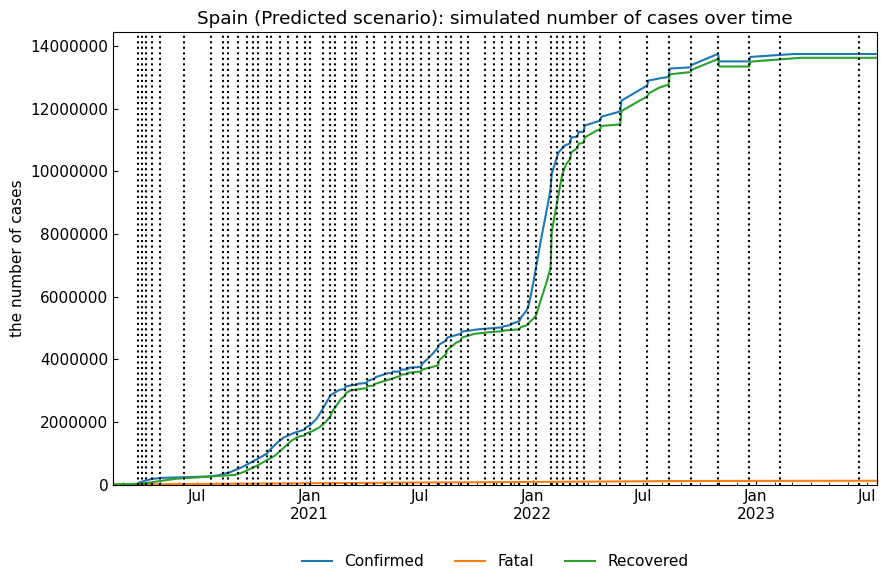

,Confirmed,Fatal,Recovered
Date,,,
2020-02-15,2.0,0.0,2.0
2020-02-16,2.0,0.0,2.0
2020-02-17,2.0,0.0,2.0
2020-02-18,2.0,0.0,2.0
2020-02-19,2.0,0.0,2.0
...,...,...,...
2023-07-14,13747553.0,120678.0,13626875.0
2023-07-15,13747553.0,120678.0,13626875.0
2023-07-16,13747553.0,120678.0,13626875.0


In [14]:
scenario.simulate(name="Predicted")

In [15]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=300, name="Predicted")

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 22 with model SeasonalityMotif in generation 0 of 1 with params {"window": 10, "point_method": "median", "distance_metric": "mqae", "k": 15, "datepart_method": "common_fourier", "independent": true} and transformations {"fillna": "pchip", "transformations": {"0": "Slice", "1": "bkfilter", "2": "AlignLastValue", "3": "AlignLastDiff"}, "transformation_params": {"0": {"method": 0.2}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "3": {"rows": 364, "displacement_rows": 1, "quantile": 1.0, "decay_span": null}}}
Model Number: 23 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "nearest", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 24 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 75, "lag_2": 24} and transformations {"fillna": "ffill", "transformations": {"0": "ScipyFilter"}, "transformat

Model Number: 30 with model ConstantNaive in generation 0 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 31 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "pad", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
Model Number: 32 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "median", "transformations": {"0": "StandardScaler", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_p

Model Number: 41 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 6, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}}}
Model Number: 42 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "Log", "2": "SeasonalDifference", "3": "AlignLastValue", "4": "DatepartRegression", "5": "LocalLinearTrend"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {}, "2": {"lag_1": 12, "method": "Median"}, "3": {"rows": 1, "lag": 28, "method": "additive", "strength": 1.0, "first_value_only": false}, "4": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_

Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4997, in inverse_transform
    df = self._inverse_one(df, i, trans_method=trans_method, bounds=bounds)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4957, in _inverse_one
    df = self.transformers[i].inverse_transform(
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 2717, in inverse_transform
    df.iloc[0:1] + adjustment,
    ~~~~~~~~~~~~~^~~~~~~~~~~~
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/pandas/core/ops/common.py", line 76, in new_method
    return method(self, other)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py", line 186, in 

Model Number: 59 with model AverageValueNaive in generation 1 of 1 with params {"method": "Median", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "AlignLastValue", "1": "Round", "2": "MaxAbsScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {"model": "middle", "decimals": 2, "on_transform": true, "on_inverse": false}, "2": {}}}
Model Number: 60 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "PositiveShift", "1": "AnomalyRemoval", "2": "bkfilter"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}, "2": {}}}
Model Number: 61 with

Model Number: 71 with model SeasonalNaive in generation 1 of 1 with params {"method": "mean", "lag_1": 2, "lag_2": 1} and transformations {"fillna": "nearest", "transformations": {"0": "QuantileTransformer", "1": "EWMAFilter", "2": "SeasonalDifference", "3": "PctChangeTransformer"}, "transformation_params": {"0": {"output_distribution": "normal", "n_quantiles": "fifth"}, "1": {"span": 62}, "2": {"lag_1": 78, "method": "LastValue"}, "3": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4997, in inverse_transform
    df = self._inverse_one(df, i, trans_method=trans_method, bounds=bounds)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4969, in _inverse_one
    df = self.transformers[i].inverse_transform(df)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

6 - AverageValueNaive with avg smape 100.36: 
Model Number: 7 of 15 with model SeasonalNaive for Validation 1 with params {"method": "mean", "lag_1": 7, "lag_2": null} and transformations {"fillna": "zero", "transformations": {"0": "bkfilter", "1": "AnomalyRemoval", "2": "FFTFilter", "3": "Log"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "chi2", "alpha": 0.05, "rolling_periods": 200, "center": false}, "fillna": "linear", "transform_dict": {"transformations": {"0": "DatepartRegression"}, "transformation_params": {"0": {"datepart_method": "simple_3", "regression_model": {"model": "DecisionTree", "model_params": {"max_depth": null, "min_samples_split": 0.1}}}}}}, "2": {"cutoff": 0.8, "reverse": false}, "3": {}}}
📈 7 - SeasonalNaive with avg smape 99.48: 
Model Number: 8 of 15 with model SeasonalNaive for Validation 1 with params {"method": "mean", "lag_1": 96, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "t

📈 7 - SeasonalNaive with avg smape 110.19: 
Model Number: 8 of 15 with model SeasonalNaive for Validation 2 with params {"method": "mean", "lag_1": 96, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
📈 8 - SeasonalNaive with avg smape 102.19: 
Model Number: 9 of 15 with model AverageValueNaive for Validation 2 with params {"method": "Median", "window": null} and transformations {"fillna": "ffill", "transformations": {"0": "AlignLastValue", "1": "Round", "2": "MaxAbsScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": 

Ensemble Horizontal component 4 of 4 LastValueNaive started
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of points failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of points failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of points failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed
2023-12-12 at 22:53:34 | ERROR | validation of points failed
2023-12-12 at 22:53:34 | ERROR | validation of end failed


In [16]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:53:35 | ERROR | validation of end failed
2023-12-12 at 22:53:35 | ERROR | validation of end failed


Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 62nd  2023-07-19 2024-05-05  0.37  0.022772  0.000284  0.024346   
          63rd  2024-05-06 2024-05-13  0.37  0.022772  0.000284  0.024873   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 62nd   0.064777       0.023            1174            14   
          63rd   0.064777       0.023            1174            13   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 62nd               5  SIR-F Model  480  
          63rd               5  SIR-F Model  480

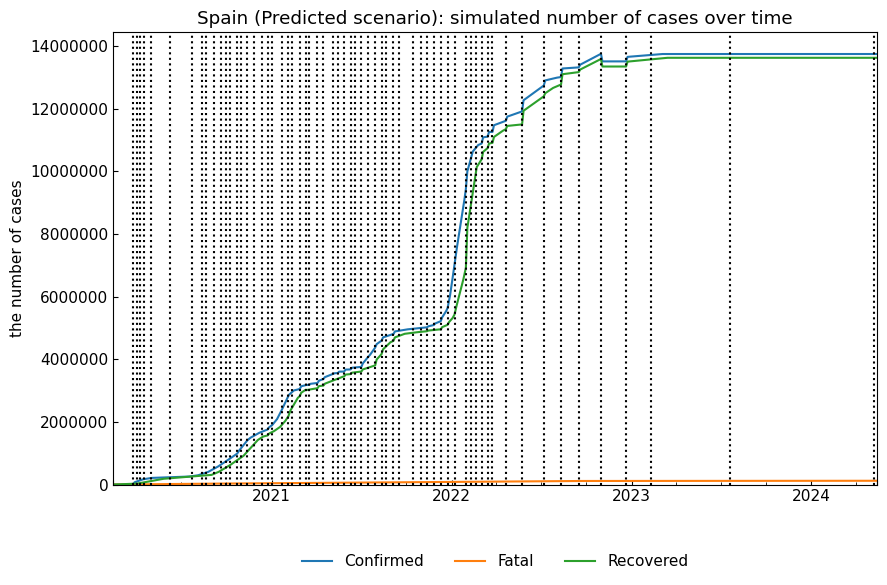

,Confirmed,Fatal,Recovered
Date,,,
2020-02-15,2.0,0.0,2.0
2020-02-16,2.0,0.0,2.0
2020-02-17,2.0,0.0,2.0
2020-02-18,2.0,0.0,2.0
2020-02-19,2.0,0.0,2.0
...,...,...,...
2024-05-09,13747553.0,120678.0,13626875.0
2024-05-10,13747553.0,120678.0,13626875.0
2024-05-11,13747553.0,120678.0,13626875.0


In [17]:
scenario.simulate(name="Predicted")

In [18]:
country = "France"
scenario = cs.ODEScenario.auto_build(geo=country, model=cs.SIRFModel)

/Users/eugene/anaconda3/lib/python3.11/site-packages/covsirphy/dynamics/_trend.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_df[self.num2str(i)] = self._linear_f(phase_df[r], a=param[0], b=param[1])
/Users/eugene/anaconda3/lib/python3.11/site-packages/covsirphy/dynamics/_trend.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_df[self.num2str(i)] = self._linear_f(phase_df[r], a=param[0], b=param[1])
/Users/eugene/anaconda3/lib/python3.11/site-packages/covsirphy/dynamics/_trend.py:98: PerformanceWarning: DataFram

2023-12-12 at 22:53:55 | INFO | 
<SIR-F Model: parameter estimation>
2023-12-12 at 22:53:55 | INFO | Running optimization with 8 CPUs...


  0%|          | 0/103 [00:00<?, ?it/s]

2023-12-12 at 22:53:55 | INFO | Running optimization with 8 CPUs...
2023-12-12 at 22:55:29 | INFO | Completed optimization. Total: 1 min 34 sec



In [19]:
scenario.summary()

Start        End     Rt     theta     kappa       rho  \
Scenario Phase                                                              
Baseline 0th   2020-02-10 2020-03-29  34.96  0.040394  0.000007  0.002351   
         1st   2020-03-30 2020-04-12   1.53  0.086394  0.000346  0.001251   
         2nd   2020-04-13 2020-05-31   0.43  0.069829  0.000139  0.000562   
         3rd   2020-06-01 2020-08-14   1.09  0.016567  0.000019  0.000602   
         4th   2020-08-15 2020-08-30   2.48  0.001058  0.000005  0.001102   
...                   ...        ...    ...       ...       ...       ...   
         98th  2023-01-10 2023-01-22   0.05  0.043691  0.000002  0.000062   
         99th  2023-01-23 2023-02-02   1.54  0.017062  0.000008  0.001029   
         100th 2023-02-03 2023-02-19   1.76  0.023704       0.0  0.001885   
         101st 2023-02-20 2023-03-04   3.48  0.009195  0.000002  0.001499   
         102nd 2023-03-05 2023-07-10    0.0  0.321739  0.000004  0.000004   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.000058        0.04            1912             5   
         1st    0.000399       0.086              36            10   
         2nd    0.001081        0.07              90            22   
         3rd    0.000522       0.017             663            21   
         4th    0.000439       0.001            2673            11   
...                  ...         ...             ...           ...   
         98th   0.001219       0.044            7055           203   
         99th   0.000651       0.017            1615            12   
         100th  0.001044       0.024           43947             7   
         101st  0.000425       0.009            7510             8   
         102nd  0.002375       0.322            3245          3004   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th              216  SIR-F Model   18  
         1st               31  SIR-F Model   18  
         2nd               12  SIR-F Model   18  
         3rd               24  SIR-F Model   18  
         4th               28  SIR-F Model   18  
...                       ...          ...  ...  
         98th              10  SIR-F Model   18  
         99th              19  SIR-F Model   18  
         100th             12  SIR-F Model   18  
         101st             29  SIR-F Model   18  
         102nd              5  SIR-F Model   18  

[103 rows x 13 columns]

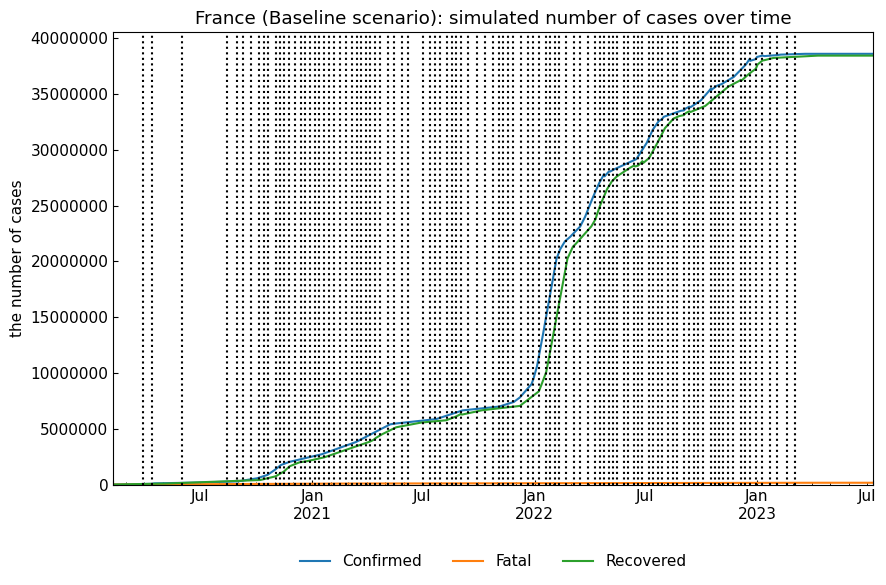

,Confirmed,Fatal,Recovered
Date,,,
2020-02-10,7.0,0.0,2.0
2020-02-11,8.0,0.0,2.0
2020-02-12,9.0,0.0,2.0
2020-02-13,10.0,0.0,2.0
2020-02-14,12.0,0.0,2.0
...,...,...,...
2023-07-06,38591224.0,161509.0,38429715.0
2023-07-07,38591224.0,161509.0,38429715.0
2023-07-08,38591224.0,161509.0,38429715.0


In [20]:
scenario.simulate(name="Baseline")

In [21]:
scenario.track()

,Scenario,Phase,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Date,,,,,,,,,,,,,
2020-02-10,Baseline,0th,34.96,0.040394,0.000007,0.002351,0.000058,0.04,1912,5,216,SIR-F Model,18
2020-02-11,Baseline,0th,34.96,0.040394,0.000007,0.002351,0.000058,0.04,1912,5,216,SIR-F Model,18
2020-02-12,Baseline,0th,34.96,0.040394,0.000007,0.002351,0.000058,0.04,1912,5,216,SIR-F Model,18
2020-02-13,Baseline,0th,34.96,0.040394,0.000007,0.002351,0.000058,0.04,1912,5,216,SIR-F Model,18
2020-02-14,Baseline,0th,34.96,0.040394,0.000007,0.002351,0.000058,0.04,1912,5,216,SIR-F Model,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-06,Baseline,102nd,0.0,0.321739,0.000004,0.000004,0.002375,0.322,3245,3004,5,SIR-F Model,18
2023-07-07,Baseline,102nd,0.0,0.321739,0.000004,0.000004,0.002375,0.322,3245,3004,5,SIR-F Model,18
2023-07-08,Baseline,102nd,0.0,0.321739,0.000004,0.000004,0.002375,0.322,3245,3004,5,SIR-F Model,18


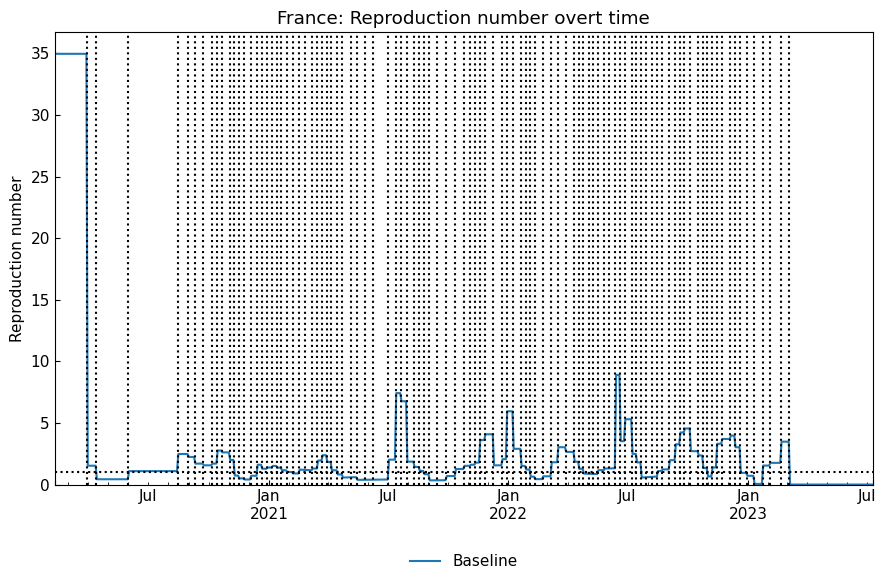

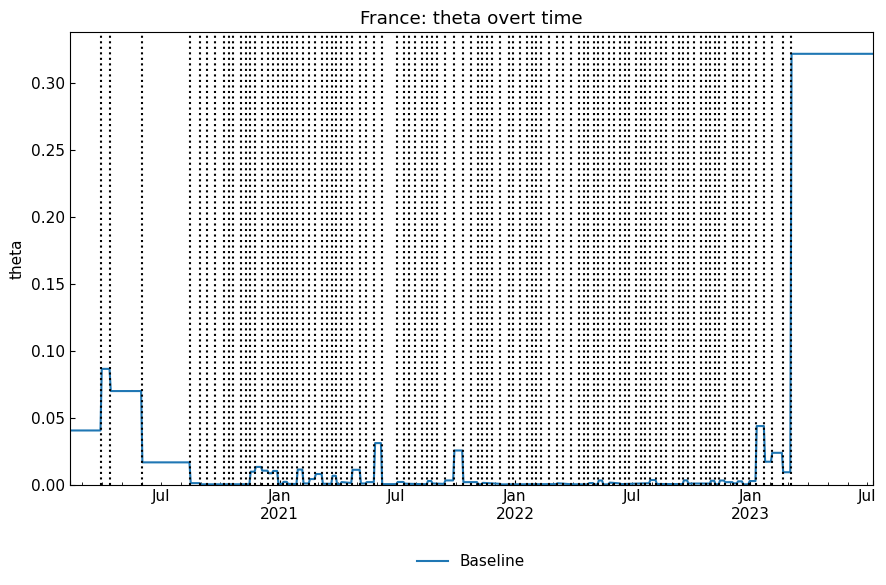

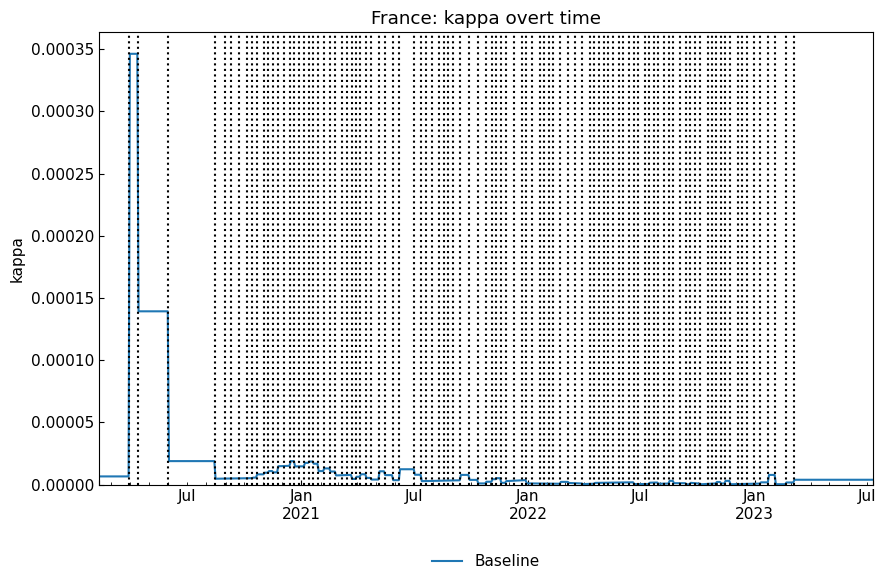

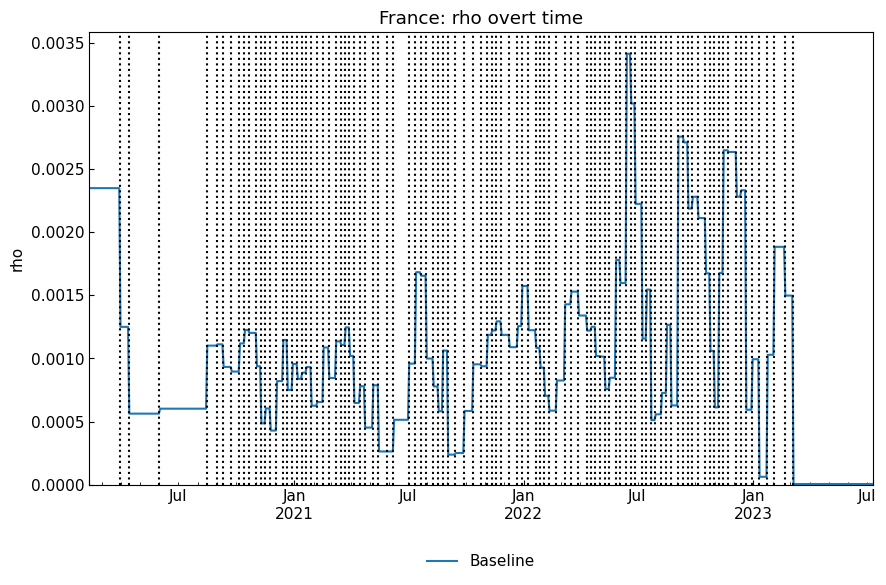

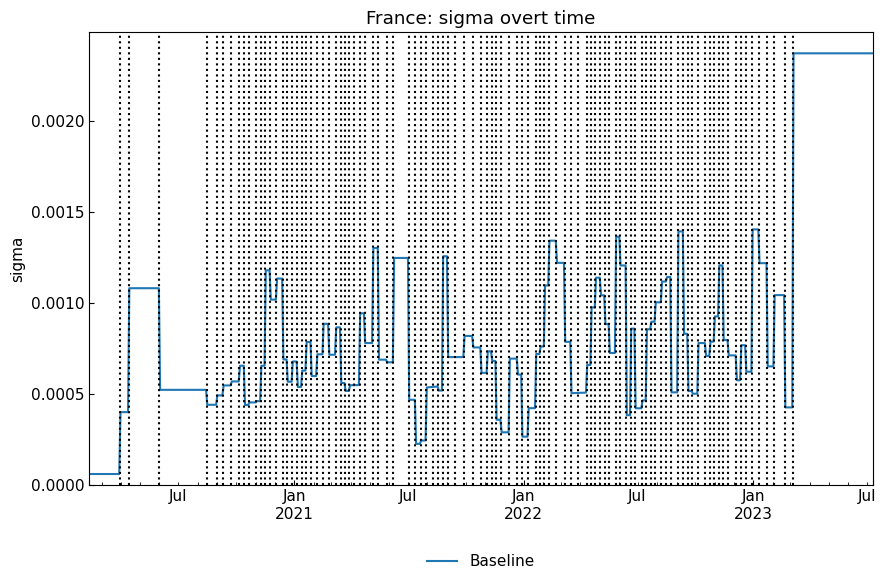

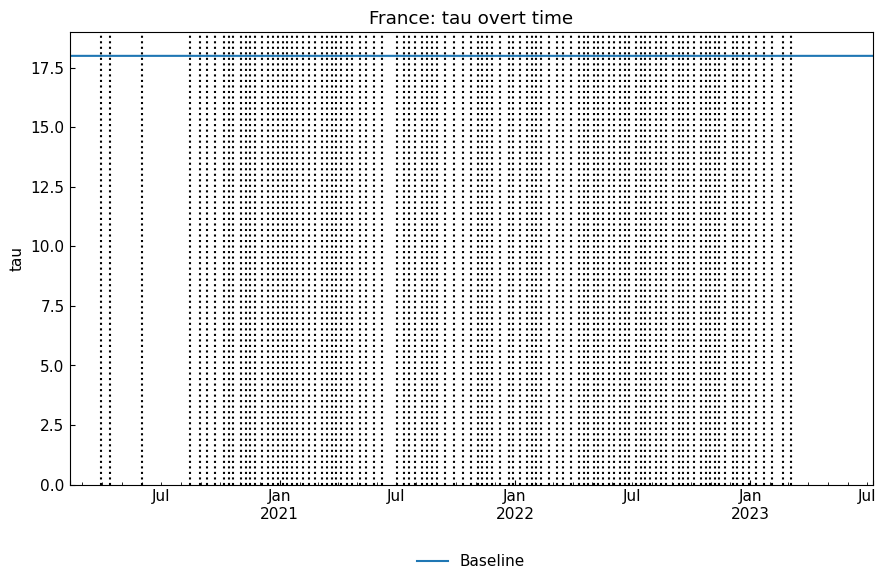

Scenario,Baseline
Date,
2020-02-10,18
2020-02-11,18
2020-02-12,18
2020-02-13,18
2020-02-14,18
...,...
2023-07-06,18
2023-07-07,18
2023-07-08,18


In [22]:
scenario.compare_param("Rt")
scenario.compare_param("theta")
scenario.compare_param("kappa")
scenario.compare_param("rho")
scenario.compare_param("sigma")
scenario.compare_param("tau")

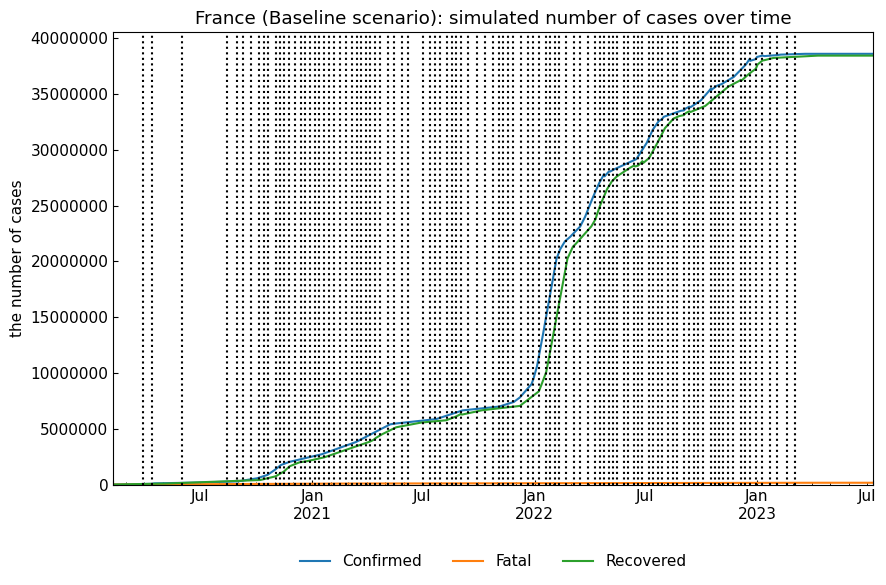

,Confirmed,Fatal,Recovered
Date,,,
2020-02-10,7.0,0.0,2.0
2020-02-11,8.0,0.0,2.0
2020-02-12,9.0,0.0,2.0
2020-02-13,10.0,0.0,2.0
2020-02-14,12.0,0.0,2.0
...,...,...,...
2023-07-06,38591224.0,161509.0,38429715.0
2023-07-07,38591224.0,161509.0,38429715.0
2023-07-08,38591224.0,161509.0,38429715.0


In [23]:
scenario.simulate(name="Baseline")

In [24]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)
future_start_date

Timestamp('2023-07-11 00:00:00')

In [25]:
scenario.build_with_template(name="Predicted", template="Baseline");

scenario.predict(days=7, name="Predicted")

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 22 with model SeasonalityMotif in generation 0 of 1 with params {"window": 10, "point_method": "median", "distance_metric": "mqae", "k": 15, "datepart_method": "common_fourier", "independent": true} and transformations {"fillna": "pchip", "transformations": {"0": "Slice", "1": "bkfilter", "2": "AlignLastValue", "3": "AlignLastDiff"}, "transformation_params": {"0": {"method": 0.2}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "3": {"rows": 364, "displacement_rows": 1, "quantile": 1.0, "decay_span": null}}}
Model Number: 23 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "nearest", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 24 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 75, "lag_2": 24} and transformations {"fillna": "ffill", "transformations": {"0": "ScipyFilter"}, "transformat

Model Number: 30 with model ConstantNaive in generation 0 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 31 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "pad", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
Model Number: 32 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "median", "transformations": {"0": "StandardScaler", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_p

Model Number: 41 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 6, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}}}
Model Number: 42 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "Log", "2": "SeasonalDifference", "3": "AlignLastValue", "4": "DatepartRegression", "5": "LocalLinearTrend"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {}, "2": {"lag_1": 12, "method": "Median"}, "3": {"rows": 1, "lag": 28, "method": "additive", "strength": 1.0, "first_value_only": false}, "4": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_

Model Number: 51 with model AverageValueNaive in generation 1 of 1 with params {"method": "Weighted_Mean", "window": 364} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "AnomalyRemoval", "1": "AlignLastValue", "2": "Round", "3": "MinMaxScaler"}, "transformation_params": {"0": {"method": "IQR", "method_params": {"iqr_threshold": 2.0, "iqr_quantiles": [0.25, 0.75]}, "fillna": "ffill", "transform_dict": null}, "1": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}, "2": {"decimals": -1, "on_transform": false, "on_inverse": true}, "3": {}}}
Model Number: 52 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "RollingMeanTransformer", "1": "SeasonalDifference", "2": "Detrend", "3": "Slice"}, "transformation_params": {"0": {"fixed": true, "window": 3}, "1": {"lag_1": 28, "method": "Mean"}, "2": {"model": "Linear"}, "3": {"method": 100}}}
Model Number: 

Model Number: 58 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "BTCD"}, "transformation_params": {"0": {"regression_model": {"model": "LinearRegression", "model_params": {}}, "max_lags": 2}}}
Model Number: 59 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "StandardScaler", "1": "KalmanSmoothing", "2": "bkfilter", "3": "AlignLastValue"}, "transformation_params": {"0": {}, "1": {"model_name": "ucm_deterministic_trend", "state_transition": [[1, 1], [0, 1]], "process_noise": [[0.01, 0], [0, 0.01]], "observation_model": [[1, 0]], "observation_noise": 0.1, "em_iter": 10}, "2": {}, "3": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 60 with model ConstantNaive in generation 1 of 1 with params {"constant": 0} and transformations {"fillna": "rolling_mean_24", "transformations": {"0

Model Number: 64 with model AverageValueNaive in generation 1 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "akima", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend", "2": "AlignLastValue", "3": "MinMaxScaler"}, "transformation_params": {"0": {}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 0.5, "first_value_only": false}, "3": {}}}
Model Number: 65 with model SeasonalNaive in generation 1 of 1 with params {"method": "lastvalue", "lag_1": 2, "lag_2": null} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "PowerTransformer", "1": "SeasonalDifference"}, "transformation_params": {"0": {}, "1": {"lag_1": 24, "method": "LastValue"}}}
Model Number: 66 with model ConstantNaive in generation 1 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue", "1": "AnomalyRemoval", "2": "STLFilter"}, "transformation_params": {"0": {"

Model Number: 74 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 75 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean", "transformations": {"0": "PositiveShift", "1": "CumSumTransformer"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 76 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean", "transformations": {"0": "RollingMeanTransformer", "1": "AlignLastValue"}, "transformation_params": {"0": {"fixed": true, "window": 3}, "1": {"rows": 4, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
TotalRuntime missing in 2!
Validation Round: 1
Validation train index is DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-

4 - ConstantNaive with avg smape 0.0: 
Model Number: 5 of 13 with model AverageValueNaive for Validation 2 with params {"method": "Weighted_Mean", "window": 364} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "DifferencedTransformer", "1": "AlignLastValue", "2": "Round", "3": "MinMaxScaler", "4": "AlignLastValue"}, "transformation_params": {"0": {}, "1": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}, "2": {"decimals": -1, "on_transform": false, "on_inverse": true}, "3": {}, "4": {"rows": 1, "lag": 7, "method": "additive", "strength": 1.0, "first_value_only": false}}}
5 - AverageValueNaive with avg smape 0.0: 
Model Number: 6 of 13 with model AverageValueNaive for Validation 2 with params {"method": "Mean", "window": null} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_thr

In [26]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:55:46 | ERROR | validation of end failed
2023-12-12 at 22:55:46 | ERROR | validation of end failed


,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,


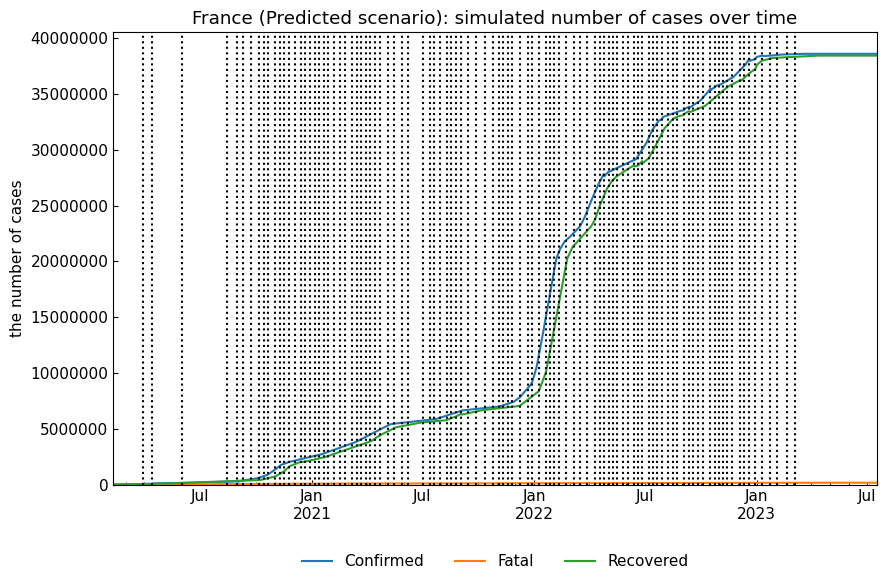

,Confirmed,Fatal,Recovered
Date,,,
2020-02-10,7.0,0.0,2.0
2020-02-11,8.0,0.0,2.0
2020-02-12,9.0,0.0,2.0
2020-02-13,10.0,0.0,2.0
2020-02-14,12.0,0.0,2.0
...,...,...,...
2023-07-13,38591224.0,161509.0,38429715.0
2023-07-14,38591224.0,161509.0,38429715.0
2023-07-15,38591224.0,161509.0,38429715.0


In [27]:
scenario.simulate(name="Predicted")

In [28]:
scenario.build_with_template(name="Predicted", template="Baseline")

scenario.predict(days=30, name="Predicted") 

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 22 with model SeasonalityMotif in generation 0 of 1 with params {"window": 10, "point_method": "median", "distance_metric": "mqae", "k": 15, "datepart_method": "common_fourier", "independent": true} and transformations {"fillna": "pchip", "transformations": {"0": "Slice", "1": "bkfilter", "2": "AlignLastValue", "3": "AlignLastDiff"}, "transformation_params": {"0": {"method": 0.2}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "3": {"rows": 364, "displacement_rows": 1, "quantile": 1.0, "decay_span": null}}}
Model Number: 23 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "nearest", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 24 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 75, "lag_2": 24} and transformations {"fillna": "ffill", "transformations": {"0": "ScipyFilter"}, "transformat

Model Number: 30 with model ConstantNaive in generation 0 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 31 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "pad", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
Model Number: 32 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "median", "transformations": {"0": "StandardScaler", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_p

Model Number: 41 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 6, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}}}
Model Number: 42 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "Log", "2": "SeasonalDifference", "3": "AlignLastValue", "4": "DatepartRegression", "5": "LocalLinearTrend"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {}, "2": {"lag_1": 12, "method": "Median"}, "3": {"rows": 1, "lag": 28, "method": "additive", "strength": 1.0, "first_value_only": false}, "4": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_

Model Number: 49 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "AlignLastValue", "1": "MaxAbsScaler", "2": "MaxAbsScaler"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "1": {}, "2": {}}}
Model Number: 50 with model AverageValueNaive in generation 1 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "SeasonalDifference", "2": "DatepartRegression"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {"lag_1": 12, "method": "Median"}, "2": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 2}}}, "holiday

Model Number: 61 with model SeasonalNaive in generation 1 of 1 with params {"method": "lastvalue", "lag_1": 2, "lag_2": 28} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "EWMAFilter", "1": "ReplaceConstant", "2": "PowerTransformer", "3": "RobustScaler"}, "transformation_params": {"0": {"span": 18}, "1": {"constant": 0, "reintroduction_model": {"model": "xgboost", "model_params": {"eta": 0.05, "min_child_weight": 1, "subsample": 1, "colsample_bylevel": 0.9, "reg_alpha": 0, "reg_lambda": 0.2, "max_depth": 6, "grow_policy": "lossguide", "quantile_alpha": 0.5, "tree_method": "hist"}, "datepart_method": "common_fourier"}, "fillna": "ffill"}, "2": {}, "3": {}}}
Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4900, in _fit
    df = self._fit_one(df, i)
         ^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform

Model Number: 70 with model ConstantNaive in generation 1 of 1 with params {"constant": 1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 71 with model AverageValueNaive in generation 1 of 1 with params {"method": "Weighted_Mean", "window": 12} and transformations {"fillna": "cubic", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals": 2, "on_transform": true, "on_inverse": false}, "2": {}}}
Model Number: 72 with model SeasonalNaive in generation 1 of 1 with params {"method": "median", "lag_1": 28, "lag_2": 28} and transformations {"fillna": "ffill", "transformations": {"0": "QuantileTransformer"}, "transformation_params": {"0": {"output_distribution": "uniform", "n_quanti

8 - GLS with avg smape 58.33: 
Model Number: 9 of 15 with model GLS for Validation 1 with params {} and transformations {"fillna": "rolling_mean", "transformations": {"0": "bkfilter", "1": "MaxAbsScaler", "2": "StandardScaler", "3": "ClipOutliers", "4": "LevelShiftTransformer"}, "transformation_params": {"0": {}, "1": {}, "2": {}, "3": {"method": "clip", "std_threshold": 3.5, "fillna": null}, "4": {"window_size": 90, "alpha": 2.5, "grouping_forward_limit": 4, "max_level_shifts": 5, "alignment": "rolling_diff_3nn"}}}
9 - GLS with avg smape 61.49: 
Model Number: 10 of 15 with model AverageValueNaive for Validation 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
10 - AverageValueNaive with avg smape 53.17: 
Model Number: 11 of 15 with model GLS for Validation 1 with params {} and transformations {"fillna": "KNNImputer", "transformat

12 - SeasonalNaive with avg smape 0.0: 
Model Number: 13 of 15 with model AverageValueNaive for Validation 2 with params {"method": "Mean", "window": null} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
13 - AverageValueNaive with avg smape 13.29: 
Model Number: 14 of 15 with model LastValueNaive for Validation 2 with params {} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}}}
14 - LastValueNaive with avg smape 94.02: 
Model Number: 15 of 15 with model LastValueNaive for Validation 2 with params {} and transformations {"fillna": "nea

In [29]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:55:59 | ERROR | validation of end failed
2023-12-12 at 22:55:59 | ERROR | validation of end failed


,,Start,End,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Scenario,Phase,,,,,,,,,,,,,
Predicted,103rd,2023-07-18,2023-08-16,0.0,0.321739,0.000004,0.000004,0.002375,0.322,3245,3004,5,SIR-F Model,18


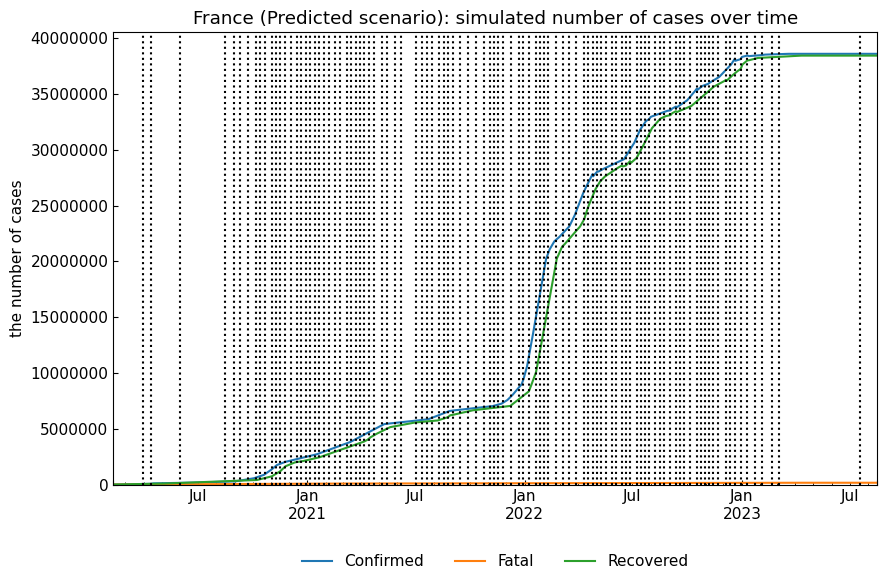

,Confirmed,Fatal,Recovered
Date,,,
2020-02-10,7.0,0.0,2.0
2020-02-11,8.0,0.0,2.0
2020-02-12,9.0,0.0,2.0
2020-02-13,10.0,0.0,2.0
2020-02-14,12.0,0.0,2.0
...,...,...,...
2023-08-12,38591224.0,161509.0,38429715.0
2023-08-13,38591224.0,161509.0,38429715.0
2023-08-14,38591224.0,161509.0,38429715.0


In [30]:
scenario.simulate(name="Predicted")

In [31]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=300, name="Predicted")

Using 6 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

Model Number: 22 with model SeasonalityMotif in generation 0 of 1 with params {"window": 10, "point_method": "median", "distance_metric": "mqae", "k": 15, "datepart_method": "common_fourier", "independent": true} and transformations {"fillna": "pchip", "transformations": {"0": "Slice", "1": "bkfilter", "2": "AlignLastValue", "3": "AlignLastDiff"}, "transformation_params": {"0": {"method": 0.2}, "1": {}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "3": {"rows": 364, "displacement_rows": 1, "quantile": 1.0, "decay_span": null}}}
Model Number: 23 with model LastValueNaive in generation 0 of 1 with params {} and transformations {"fillna": "nearest", "transformations": {"0": "RobustScaler"}, "transformation_params": {"0": {}}}
Model Number: 24 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 75, "lag_2": 24} and transformations {"fillna": "ffill", "transformations": {"0": "ScipyFilter"}, "transformat

Model Number: 30 with model ConstantNaive in generation 0 of 1 with params {"constant": -1} and transformations {"fillna": "rolling_mean", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 31 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "pad", "transformations": {"0": "StandardScaler", "1": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {"method": "rolling_zscore", "method_params": {"distribution": "norm", "alpha": 0.05, "rolling_periods": 300, "center": true}, "fillna": "ffill", "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 7}}}}}}
Model Number: 32 with model GLS in generation 0 of 1 with params {} and transformations {"fillna": "median", "transformations": {"0": "StandardScaler", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_p

Model Number: 41 with model SeasonalNaive in generation 0 of 1 with params {"method": "lastvalue", "lag_1": 6, "lag_2": null} and transformations {"fillna": "ffill_mean_biased", "transformations": {"0": "ClipOutliers"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 1, "fillna": null}}}
Model Number: 42 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean", "window": null} and transformations {"fillna": "fake_date", "transformations": {"0": "Round", "1": "Log", "2": "SeasonalDifference", "3": "AlignLastValue", "4": "DatepartRegression", "5": "LocalLinearTrend"}, "transformation_params": {"0": {"decimals": 0, "on_transform": true, "on_inverse": true}, "1": {}, "2": {"lag_1": 12, "method": "Median"}, "3": {"rows": 1, "lag": 28, "method": "additive", "strength": 1.0, "first_value_only": false}, "4": {"regression_model": {"model": "ElasticNet", "model_params": {}}, "datepart_method": ["dayofweek", 365.25], "polynomial_degree": null, "transform_

Model Number: 51 with model LastValueNaive in generation 1 of 1 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "MaxAbsScaler", "1": "QuantileTransformer", "2": "LevelShiftTransformer", "3": "AlignLastValue"}, "transformation_params": {"0": {}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {"window_size": 30, "alpha": 2.0, "grouping_forward_limit": 4, "max_level_shifts": 30, "alignment": "last_value"}, "3": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
Model Number: 52 with model ConstantNaive in generation 1 of 1 with params {"constant": 0} and transformations {"fillna": "time", "transformations": {"0": null}, "transformation_params": {"0": {}}}
Model Number: 53 with model GLS in generation 1 of 1 with params {} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "MinMaxScaler", "1": "Detrend", "2": "bkfilter", "3": "AlignLastValue"}, "transformation_params": {"0": {

Template Eval Error: Traceback (most recent call last):
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4997, in inverse_transform
    df = self._inverse_one(df, i, trans_method=trans_method, bounds=bounds)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 4957, in _inverse_one
    df = self.transformers[i].inverse_transform(
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/autots/tools/transform.py", line 2717, in inverse_transform
    df.iloc[0:1] + adjustment,
    ~~~~~~~~~~~~~^~~~~~~~~~~~
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/pandas/core/ops/common.py", line 76, in new_method
    return method(self, other)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/eugene/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py", line 186, in 

TotalRuntime missing in 2!
Validation Round: 1
Validation train index is DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24'],
              dtype='datetime64[ns]', name='Date', length=684, freq=None)
Model Number: 1 of 16 with model GLS for Validation 1 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "ClipOutliers", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {}, "2": {"method": "zscore", "method_params": {"distribution": "norm", "alpha": 0.05}, "fillna": "ffill", "transform_dict": null}}}
📈 1 - GLS with avg smape 112.58: 
Model Num

16 - GLS with avg smape 75.42: 
Validation Round: 2
Validation train index is DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27'],
              dtype='datetime64[ns]', name='Date', length=384, freq=None)
Model Number: 1 of 16 with model GLS for Validation 2 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "ClipOutliers", "1": "RobustScaler", "2": "AnomalyRemoval"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 4, "fillna": null}, "1": {}, "2": {"method": "zscore", "method_params": {"distribution": "norm", "alpha": 0.05}, "fillna": "ffill", "transform_dict": null}}}
📈 1 - GLS with avg smape 93.92: 
Model

15 - GLS with avg smape 193.7: 
Model Number: 16 of 16 with model GLS for Validation 2 with params {} and transformations {"fillna": "pchip", "transformations": {"0": "CenterSplit", "1": "AlignLastValue", "2": "AlignLastValue"}, "transformation_params": {"0": {"fillna": "pchip", "center": "zero"}, "1": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}, "2": {"rows": 1, "lag": 1, "method": "additive", "strength": 1.0, "first_value_only": false}}}
16 - GLS with avg smape 69.08: 
TotalRuntime missing in 3!
Validation Round: 1
Validation train index is DatetimeIndex(['2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24'],
              dty

2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of points failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of points failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of points failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of points failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
2023-12-12 at 22:56:17 | ERROR | validation of end failed
20

2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of points failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of points failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of points failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of points failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of end failed
2023-12-12 at 22:56:18 | ERROR | validation of points failed

In [32]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

2023-12-12 at 22:56:19 | ERROR | validation of end failed
2023-12-12 at 22:56:19 | ERROR | validation of end failed


Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 103rd 2023-08-17 2023-08-19  0.46  0.321739  0.000004  0.000896   
          104th 2023-08-20 2023-08-26  0.43  0.321739  0.000004  0.000847   
          105th 2023-08-27 2023-08-29  0.48   0.32174  0.000004  0.000933   
          106th 2023-08-30 2023-09-02  0.46   0.32174  0.000004  0.000888   
          107th 2023-09-03 2023-09-07  0.43  0.321742  0.000004  0.000847   
...                    ...        ...   ...       ...       ...       ...   
          165th 2024-05-17 2024-05-19  0.47  0.322195  0.000004  0.000933   
          166th 2024-05-20 2024-05-23  0.45  0.322208  0.000004  0.000888   
          167th 2024-05-24 2024-05-28  0.42  0.322225  0.000004  0.000847   
          168th 2024-05-29 2024-05-31  0.46  0.322235  0.000004   0.00093   
          169th 2024-06-01 2024-06-09  0.42  0.322267  0.000004  0.000847   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 103rd  0.001322       0.322            3245            14   
          104th  0.001331       0.322            3245            15   
          105th  0.001316       0.322            3245            13   
          106th  0.001314       0.322            3245            14   
          107th  0.001333       0.322            3245            15   
...                   ...         ...             ...           ...   
          165th  0.001352       0.322            3245            13   
          166th  0.001347       0.322            3245            14   
          167th  0.001358       0.322            3245            15   
          168th  0.001353       0.322            3245            13   
          169th  0.001358       0.322            3245            15   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 103rd              9  SIR-F Model   18  
          104th              9  SIR-F Model   18  
          105th             10  SIR-F Model   18  
          106th             10  SIR-F Model   18  
          107th              9  SIR-F Model   18  
...                        ...          ...  ...  
          165th              9  SIR-F Model   18  
          166th              9  SIR-F Model   18  
          167th              9  SIR-F Model   18  
          168th              9  SIR-F Model   18  
          169th              9  SIR-F Model   18  

[67 rows x 13 columns]

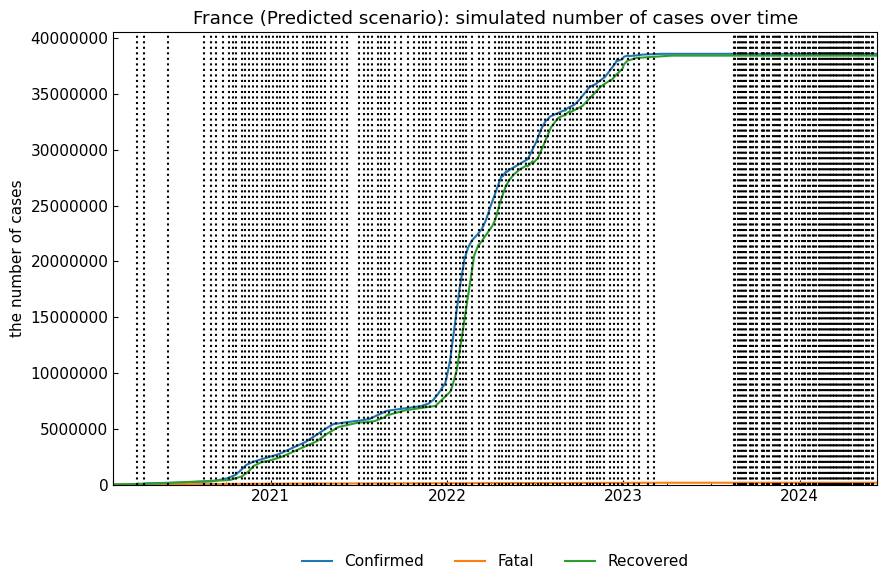

,Confirmed,Fatal,Recovered
Date,,,
2020-02-10,7.0,0.0,2.0
2020-02-11,8.0,0.0,2.0
2020-02-12,9.0,0.0,2.0
2020-02-13,10.0,0.0,2.0
2020-02-14,12.0,0.0,2.0
...,...,...,...
2024-06-05,38591224.0,161509.0,38429715.0
2024-06-06,38591224.0,161509.0,38429715.0
2024-06-07,38591224.0,161509.0,38429715.0


In [33]:
scenario.simulate(name="Predicted")